In [13]:
#import will2live
import pandas as pd

In [12]:
# Rename these to more user friendly variables
import pandas as pd

def toggle_column_names(df):
    # Mapping of technical column names to client-friendly names
    name_mapping = {
        'wk_ending': 'Week Ending',
        'itemdesc': 'Item Description',
        'totunits': 'Total Units',
        'wavg_price': 'Weighted Average Price',
        'agc_atpd': 'Average Transactions Per Day',
        'total_week_units': 'Total Weekly Units',
        'item_proportion': 'Weekly Item Proportion',
        'rev': 'Revenue',
        'adus': 'Average Daily Units Sold',
        'cost': 'Cost Per Unit',
        'cost_total': 'Total Cost',
        'profit': 'Profit'
    }
    
    # Reverse mapping for client-friendly to technical
    reverse_mapping = {v: k for k, v in name_mapping.items()}
    
    # Function to switch names based on current columns
    new_columns = {col: name_mapping.get(col, reverse_mapping.get(col, col)) 
                   for col in df.columns}
    
    df.rename(columns=new_columns, inplace=True)

# Example usage:
# Assume 'df' is your DataFrame
# toggle_column_names(df)
# Now 'df' will have the toggled column names


In [3]:
#toggle_column_names(df2)

In [65]:
df2.head(2)

wk_ending       itemdesc  totunits  wavg_price     agc_atpd  \
0 2013-01-12  Beef Category  338249.0        1.51  1338.590323   
1 2013-01-12        Big Mac   29791.0        3.69  1338.590323   

   total_week_units  item_proportion        rev          adus      cost  \
0         1499153.0         0.225627  510755.99  48321.285714  1.114476   
1         1499153.0         0.019872  109928.79   4255.857143  2.343206   

      cost_total         profit  
0  376970.456952  133785.533048  
1   69806.460349   40122.329651

In [66]:
df2.to_csv('DataForViz.csv')

In [14]:
df2=pd.read_csv('DataForViz.csv')

In [15]:
df2.head(3)

Unnamed: 0   wk_ending       itemdesc  totunits  wavg_price     agc_atpd  \
0           0  2013-01-12  Beef Category  338249.0        1.51  1338.590323   
1           1  2013-01-12        Big Mac   29791.0        3.69  1338.590323   
2           2  2013-01-12   Cheeseburger   53842.0        0.99  1338.590323   

   total_week_units  item_proportion        rev          adus      cost  \
0         1499153.0         0.225627  510755.99  48321.285714  1.114476   
1         1499153.0         0.019872  109928.79   4255.857143  2.343206   
2         1499153.0         0.035915   53303.58   7691.714286  0.599492   

      cost_total         profit  
0  376970.456952  133785.533048  
1   69806.460349   40122.329651  
2   32277.851683   21025.728317

In [16]:
import plotly.express as px

### Plotlys we'll likley have to deprecate

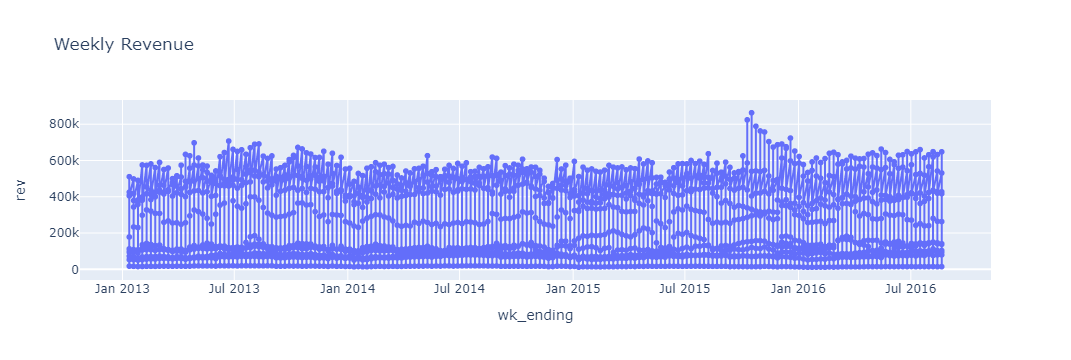

In [18]:
fig = px.line(df2, x='wk_ending', y='rev', title='Weekly Revenue', markers=True)
fig.update_traces(mode='markers+lines', hoverinfo='text+name', line=dict(shape='linear'))
fig.update_layout(hovermode='x unified')

# Enhance hover template to show more information
fig.update_traces(
    hovertemplate='<b>Week Ending</b>: %{x}<br>'+
                  '<b>Revenue</b>: $%{y:.2f}<br>'+
                  '<b>Item</b>: %{customdata[0]}<extra></extra>',
    customdata=df2[['itemdesc']].values
)

# Show the plot
fig.show()

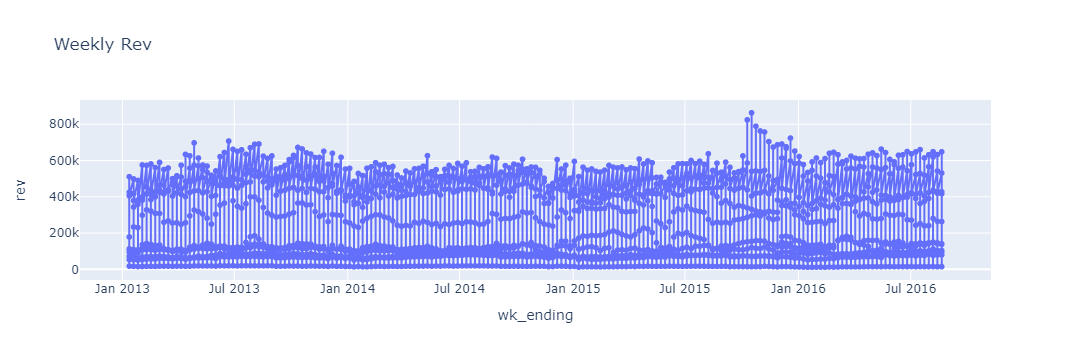

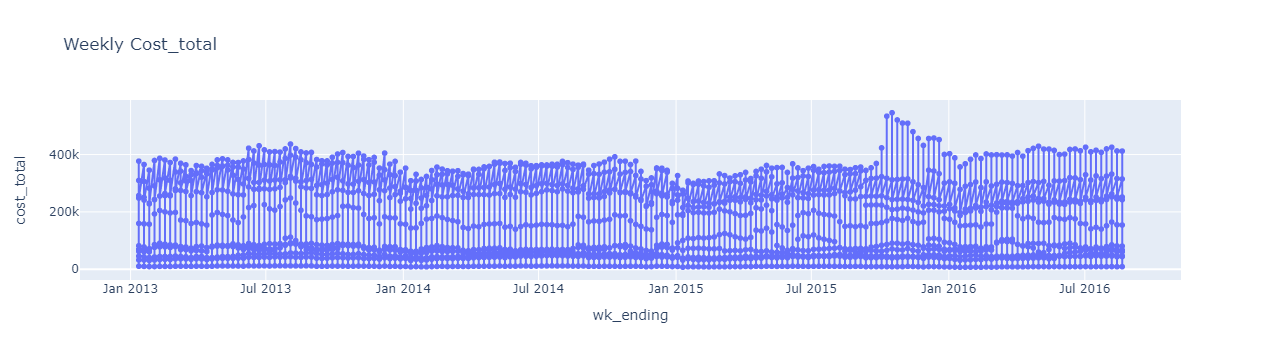

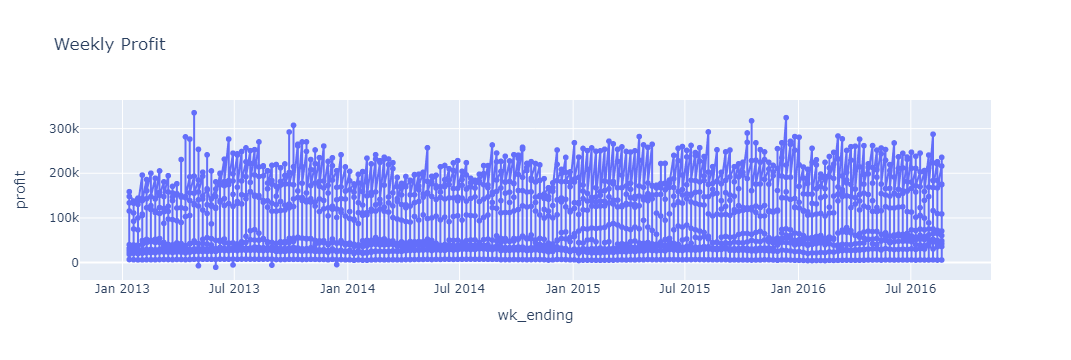

In [27]:
import plotly.express as px


# Assuming df2 contains 'totalcost', 'profit', and 'itemdesc' columns
metrics = ['rev', 'cost_total', 'profit']

# Interactive elements like dropdowns are not available in Plotly Express;
# you would need Dash or a similar framework to add those.

# For now, let's create a static line plot for each metric
for metric in metrics:
    fig = px.line(df2, x='wk_ending', y=metric, title=f'Weekly {metric.capitalize()}', markers=True)
    fig.update_traces(mode='markers+lines', hoverinfo='text+name', line=dict(shape='linear'))
    fig.update_layout(hovermode='x unified')
    fig.update_traces(
        hovertemplate='<b>Week Ending</b>: %{x}<br>'+
                      f'<b>{metric.capitalize()}</b>: $%{{y:.2f}}<br>'+
                      '<b>Item</b>: %{text}<extra></extra>',
        text=df2['itemdesc']
    )
    # Show the plot
    fig.show()

# Note: This will create and display multiple plots separately, one for each metric.

# To enable user interaction to select metrics or time periods, or to filter by 'itemdesc',
# you need to create a Dash app with callback functions that update the plot based on user input.


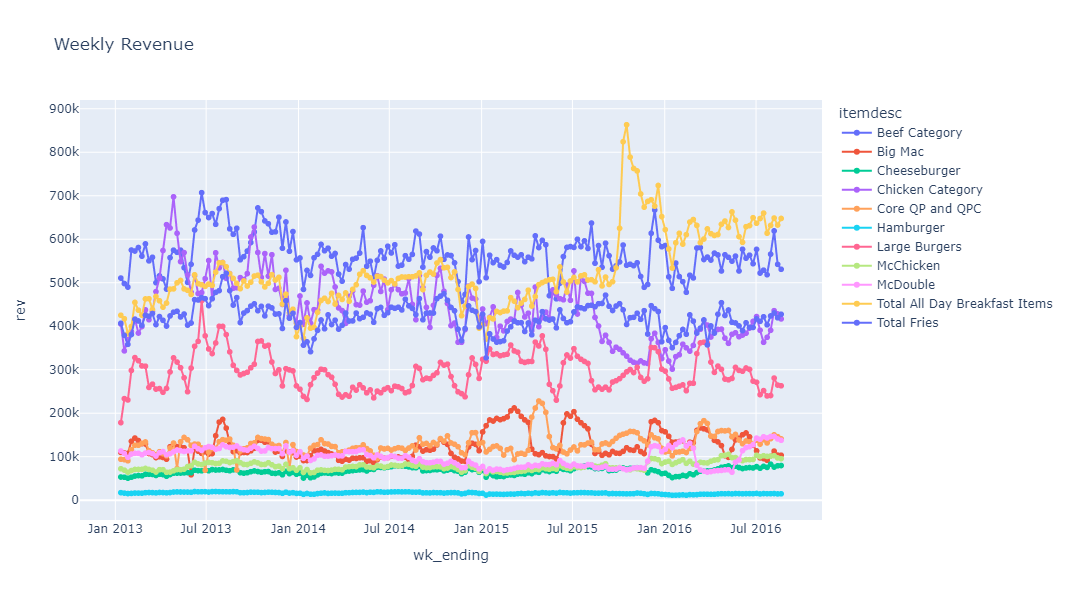

In [34]:
import plotly.express as px

# Adjust the figure size by updating the layout
fig = px.line(df2, x='wk_ending', y='rev', color='itemdesc',  # Add the color argument
              title='Weekly Revenue', markers=True)

fig.update_traces(mode='markers+lines', hoverinfo='text+name', line=dict(shape='linear'))
fig.update_layout(hovermode='x unified', 
                  width=1000,  # Customize the width of the figure
                  height=600)  # Customize the height of the figure

# Enhance hover template to show more information
fig.update_traces(
    hovertemplate='<b>Week Ending</b>: %{x}<br>'+
                  '<b>Revenue</b>: $%{y:.2f}<br>'+
                  '<b>Item</b>: %{text}<extra></extra>',
    text=df2['itemdesc'].values
)

# Show the plot
fig.show()


In [28]:
df2

wk_ending                       itemdesc  totunits  wavg_price  \
0    2013-01-12                  Beef Category  338249.0        1.51   
1    2013-01-12                        Big Mac   29791.0        3.69   
2    2013-01-12                   Cheeseburger   53842.0        0.99   
3    2013-01-12               Chicken Category  204602.0        1.98   
4    2013-01-12                Core QP and QPC   25947.0        3.63   
...         ...                            ...       ...         ...   
2074 2016-08-20                  Large Burgers   63695.0        4.13   
2075 2016-08-20                      McChicken   74073.0        1.29   
2076 2016-08-20                       McDouble   92468.0        1.49   
2077 2016-08-20  Total All Day Breakfast Items  390224.0        1.66   
2078 2016-08-20                    Total Fries  286916.0        1.49   

         agc_atpd  total_week_units  item_proportion        rev          adus  \
0     1338.590323         1499153.0         0.225627  510755.99  48321.285714   
1     1338.590323         1499153.0         0.019872  109928.79   4255.857143   
2     1338.590323         1499153.0         0.035915   53303.58   7691.714286   
3     1338.590323         1499153.0         0.136478  405111.96  29228.857143   
4     1338.590323         1499153.0         0.017308   94187.61   3706.714286   
...           ...               ...              ...        ...           ...   
2074  1254.437500         1531943.0         0.041578  263060.35   9099.285714   
2075  1254.437500         1531943.0         0.048352   95554.17  10581.857143   
2076  1254.437500         1531943.0         0.060360  137777.32  13209.714286   
2077  1254.437500         1531943.0         0.254725  647771.84  55746.285714   
2078  1254.437500         1531943.0         0.187289  427504.84  40988.000000   

          cost     cost_total         profit  
0     1.114476  376970.456952  133785.533048  
1     2.343206   69806.460349   40122.329651  
2     0.599492   32277.851683   21025.728317  
3     1.256063  256993.102603  148118.857397  
4     2.396508   62182.191429   32005.418571  
...        ...            ...            ...  
2074  2.418794  154065.061587  108995.288413  
2075  0.629556   46633.068667   48921.101333  
2076  0.723968   66943.896508   70833.423492  
2077  1.056037  412090.996741  235680.843259  
2078  0.877937  251894.031111  175610.808889  

[2079 rows x 12 columns]

Available item descriptions: ['Beef Category' 'Big Mac' 'Cheeseburger' 'Chicken Category'
 'Core QP and QPC' 'Hamburger' 'Large Burgers' 'McChicken' 'McDouble'
 'Total All Day Breakfast Items' 'Total Fries']


Enter an item description from the list above:  Beef Category


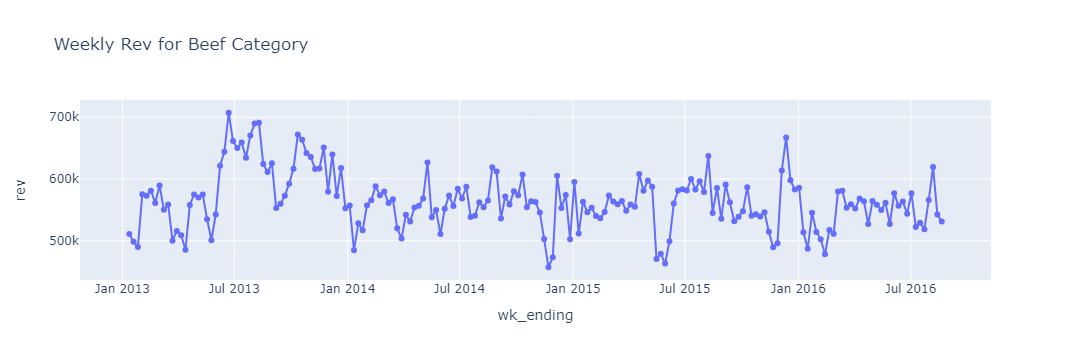

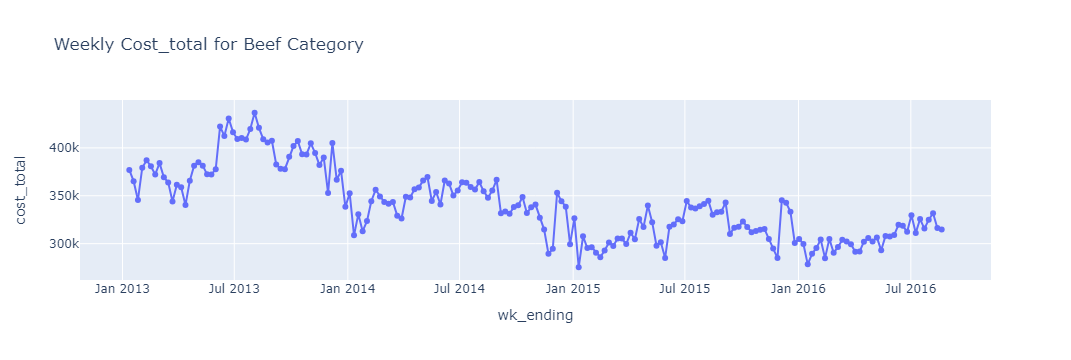

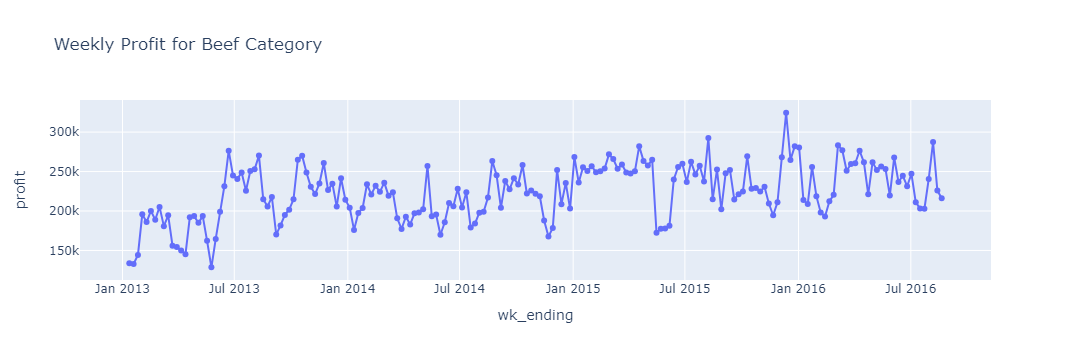

In [31]:
import plotly.express as px

# Assuming 'df2' is your DataFrame that's already been loaded

# Get the list of unique item descriptions
unique_items = df2['itemdesc'].unique()
print("Available item descriptions:", unique_items)

# Get user input for the item description they want to see in the graph
user_input_itemdesc = input("Enter an item description from the list above: ")

# Validate user input and filter the DataFrame for the selected item description
if user_input_itemdesc in unique_items:
    filtered_df = df2[df2['itemdesc'] == user_input_itemdesc]
    
    metrics = ['rev', 'cost_total', 'profit']
    for metric in metrics:
        fig = px.line(filtered_df, x='wk_ending', y=metric, title=f'Weekly {metric.capitalize()} for {user_input_itemdesc}', markers=True)
        fig.update_traces(mode='markers+lines', hoverinfo='text+name', line=dict(shape='linear'))
        fig.update_layout(hovermode='x unified')
        fig.update_traces(
            hovertemplate='<b>Week Ending</b>: %{x}<br>'+
                          f'<b>{metric.capitalize()}</b>: $%{{y:.2f}}<br>'+
                          '<b>Item</b>: %{text}<extra></extra>',
            text=filtered_df['itemdesc']
        )
        # Show the plot
        fig.show()
else:
    print(f"Item description '{user_input_itemdesc}' not found. Please enter a valid item description from the list.")


## DASH

In [20]:
metrics = ['rev', 'cost_total', 'profit']

In [22]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='metric-dropdown',
        options=[{'label': metric.capitalize(), 'value': metric} for metric in metrics],
        value='rev' # Default value
  
    ),
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df2['wk_ending'].min(),
        end_date=df2['wk_ending'].max()
    ),
    dcc.Dropdown(
        id='item-dropdown',
        options=[{'label': i, 'value': i} for i in df2['itemdesc'].unique()],
        value=df2['itemdesc'].unique()[0],  # Default value
        multi=True
    ),
    dcc.Graph(id='line-plot')
])

@app.callback(
    Output('line-plot', 'figure'),
    [Input('metric-dropdown', 'value'),
     Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('item-dropdown', 'value')]  # This should be a list of selected items.
)
def update_graph(selected_metric, start_date, end_date, selected_items):
    # Convert selected_items to a list if it's not one already
    selected_items = [selected_items] if isinstance(selected_items, str) else selected_items

    # Filter dataframe based on selections
    filtered_df = df2[(df2['wk_ending'] >= start_date) & 
                      (df2['wk_ending'] <= end_date) & 
                      (df2['itemdesc'].isin(selected_items))]  # selected_items must be a list-like object

    # Create the figure
    fig = px.line(filtered_df, x='wk_ending', y=selected_metric, 
                  color='itemdesc', title=f'Weekly {selected_metric.capitalize()}', 
                  markers=True)

    # Rest of your figure updates here...

    return fig


if __name__ == '__main__':
    app.run_server(debug=True)


In [38]:
### We also have a total revenue column, of all the items in our shortlist combined, excluding beef. 
## We weren't sure if the categorizations are correct, but that's an easy fix with a little more clarity on what the correct aggregated groups are, we didn't want to make any assumptions. and we're looking forward to partnering with the client here.

## That being said, maybe it would be good for us to create another dataframe that has the total items for each week as the combo of everything in the shortlist minus "beef category"

In [23]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html, Input, Output

# Assuming 'df2' is your DataFrame
metrics = ['rev', 'cost_total', 'profit']
long_df = df2.melt(id_vars=['wk_ending', 'itemdesc'], value_vars=metrics, 
                   var_name='metric', value_name='value')

# Ensure 'wk_ending' is a datetime type for filtering
long_df['wk_ending'] = pd.to_datetime(long_df['wk_ending'])

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='metric-dropdown',
        options=[{'label': m.capitalize(), 'value': m} for m in metrics],
        value=['rev'],  # default to revenue
        multi=True  # allow selecting multiple metrics
    ),
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=long_df['wk_ending'].min(),
        end_date=long_df['wk_ending'].max(),
        display_format='MMM DD, YYYY'
    ),
    dcc.Dropdown(
        id='item-dropdown',
        options=[{'label': i, 'value': i} for i in long_df['itemdesc'].unique()],
        value=long_df['itemdesc'].unique().tolist(),  # default to all items
        multi=True  # allow selecting multiple items
    ),
    dcc.Graph(id='line-plot')
])

@app.callback(
    Output('line-plot', 'figure'),
    [Input('metric-dropdown', 'value'),
     Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('item-dropdown', 'value')]
)
def update_graph(selected_metrics, start_date, end_date, selected_items):
    # Filter dataframe based on selections
    filtered_df = long_df[(long_df['wk_ending'] >= start_date) &
                          (long_df['wk_ending'] <= end_date) &
                          (long_df['itemdesc'].isin(selected_items)) &
                          (long_df['metric'].isin(selected_metrics))]
    
    # Create the figure
    fig = px.line(filtered_df, x='wk_ending', y='value', color='metric',
                  title='Weekly Metrics',
                  markers=True)
    
    # Update layout for better readability
    fig.update_layout(hovermode='x unified')
    fig.update_traces(mode='markers+lines', hoverinfo='text+name', line=dict(shape='linear'))
    fig.update_traces(
        hovertemplate='<b>Week Ending</b>: %{x}<br>' +
                      '<b>Metric</b>: %{metric}<br>' +
                      '<b>Value</b>: $%{y:.2f}<br>' +
                      '<b>Item</b>: %{text}<extra></extra>',
        text=filtered_df['itemdesc']
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [24]:
## After this, we deploy baby 